# 分析ハンズオン
## 2駅ルール内で、駅近で家賃が安い物件が比較的多い駅に引っ越したい

In [1]:
# %reset
import pandas as pd

In [2]:
df = pd.read_json('https://storage.googleapis.com/chck/handson/jupyter/homes_nearby_office.json')
df.count()

_type               10964
address             10964
birthday            10964
deposit             10964
dimension           10964
layout              10964
nearest_stations    10964
rent                10964
tip                 10964
title               10964
url                 10964
window_angle        10964
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10964 entries, 0 to 10963
Data columns (total 12 columns):
_type               10964 non-null object
address             10964 non-null object
birthday            10964 non-null object
deposit             10964 non-null object
dimension           10964 non-null object
layout              10964 non-null object
nearest_stations    10964 non-null object
rent                10964 non-null object
tip                 10964 non-null object
title               10964 non-null object
url                 10964 non-null object
window_angle        10964 non-null object
dtypes: object(12)
memory usage: 1.1+ MB


In [4]:
"""基本統計量が出せるdescribe
countはカウント、
uniqueは重複抜きカウント、
topは一番多かった（重複していた）項目、
freqはtopの数
"""

df.drop(['_type', 'nearest_stations'], axis='columns').describe()

,address,birthday,deposit,dimension,layout,rent,tip,title,url,window_angle
count,10964,10964,10964,10964,10964,10964,10964,10964,10964,10964
unique,1911,662,190,3131,5006,2192,150,4248,10964,9
top,東京都世田谷区三軒茶屋1丁目,2017年3月 ( 新築 ),1ヶ月,20m²,ワンルーム,8.5万円 ( - ),1ヶ月,ロイジェントパークス赤坂,https://www.homes.co.jp/chintai/ky-23d9c4f20a2...,南
freq,192,554,7091,109,288,87,6978,137,1,2612


## 1.前処理地獄ツアー

In [5]:
df.head(1)

,_type,address,birthday,deposit,dimension,layout,nearest_stations,rent,tip,title,url,window_angle
0,IdeallifeItem,東京都港区南青山6丁目15-6,1986年7月 ( 築31年 ),4ヶ月,213m²,4LDK\n ( リビング 32帖\nダイニングキッチン 12帖\n洋室 17.5帖...,"[東京メトロ銀座線 表参道駅 徒歩9分, ＪＲ山手線 渋谷駅 徒歩13分, 東京地下鉄日比谷...",80万円 ( - ),無,ケミーコート,https://www.homes.co.jp/chintai/ky-12341256819...,南


In [6]:
df = df.drop('_type', axis='columns')

In [7]:
df.head(1)

,address,birthday,deposit,dimension,layout,nearest_stations,rent,tip,title,url,window_angle
0,東京都港区南青山6丁目15-6,1986年7月 ( 築31年 ),4ヶ月,213m²,4LDK\n ( リビング 32帖\nダイニングキッチン 12帖\n洋室 17.5帖...,"[東京メトロ銀座線 表参道駅 徒歩9分, ＪＲ山手線 渋谷駅 徒歩13分, 東京地下鉄日比谷...",80万円 ( - ),無,ケミーコート,https://www.homes.co.jp/chintai/ky-12341256819...,南


In [8]:
df.rent.unique()

array(['80万円 (  -  )', '36万円 (  -  )', '62万円 (  -  )', ...,
       '33万円 ( 15,000円 )', '56.8万円 ( 20,000円 )', '14.9万円 ( 15,000円 )'], dtype=object)

In [9]:
len(df.rent.unique())

2192

In [10]:
# [x for x in list] は 「list内包」というeach的な構文
# '万' in ''100万円' は '100万円'.include('万') 的な構文
len([rent for rent in df.rent.unique() if '(' in rent])

2192

In [11]:
len([rent for rent in df.rent.unique() if '万円' in rent])

2192

In [12]:
"""↑rentカラムは「(」と「万円」が必ず含まれていることがわかった
ので、カッコ内（共益費）とそれ以外（家賃そのもの）に情報を分ける
"""

# 家賃を抽出するメソッドを作る
def extract_monthly_fees(rent):
    return rent.split('(')[0].replace("万円", "")

print(extract_monthly_fees("15.3万円(10000円)"))
print(extract_monthly_fees("80万円 (  -  )"))
print(extract_monthly_fees("12.2万円 ( 11,000円 )"))

15.3
80 
12.2 


In [42]:
df['monthly_fees'] = df.rent.apply(extract_monthly_fees).astype(float) #.apply(lambda fee: fee*10000).astype(int)
df['monthly_fees'].sort_values()

2033       2.0
1737       2.7
2006       2.7
1792       2.8
1993       3.0
2008       3.0
1981       3.3
3021       3.4
2041       3.4
2459       3.5
981        3.5
2035       3.5
2058       3.5
2036       3.6
5151       3.6
67         3.9
1941       3.9
1980       3.9
1940       3.9
1987       3.9
1992       4.0
2030       4.0
1924       4.0
983        4.0
233        4.0
1902       4.0
3016       4.0
234        4.0
984        4.0
8838       4.0
         ...  
167      135.0
103      135.0
10692    139.0
10693    139.0
10694    139.0
93       140.0
278      143.0
5514     145.0
5500     147.0
277      148.0
9436     150.0
10690    152.5
5505     153.0
264      155.0
5518     155.0
5414     156.0
279      159.8
280      161.0
104      170.0
1323     170.0
5517     170.0
2205     173.0
5966     183.0
5443     184.0
5516     185.0
86       190.0
5460     195.0
159      195.0
163      198.0
5494     210.0
Name: monthly_fees, dtype: float64

In [14]:
# 共益費を抽出するメソッドを作る
import re
def extract_cond_fees(rent):
    if "-" in rent:
        return 0
    else:
        return re.sub(r"円|\)|,", "", rent.split('(')[1]).strip()

print(extract_cond_fees("15.3万円(10000円)"))
print(extract_cond_fees("80万円 (  -  )"))
print(extract_cond_fees("12.2万円 ( 11,000円 )"))

10000
0
11000


In [45]:
df['cond_fees'] = df.rent.apply(extract_cond_fees).astype(float).apply(lambda fee: fee/10000)
df['cond_fees'].sort_values()

0         0.000
3698      0.000
3699      0.000
3700      0.000
3706      0.000
3707      0.000
3708      0.000
3710      0.000
3716      0.000
3718      0.000
3724      0.000
9563      0.000
3730      0.000
3734      0.000
3736      0.000
3737      0.000
3738      0.000
3739      0.000
3740      0.000
3743      0.000
3745      0.000
3746      0.000
3747      0.000
3750      0.000
9560      0.000
3752      0.000
3697      0.000
9564      0.000
3692      0.000
9566      0.000
          ...  
9422      3.000
9427      3.000
969       3.000
971       3.000
9622      3.200
9604      3.700
7         3.755
276       4.000
161       4.000
275       4.000
120       4.000
274       4.000
271       4.000
270       4.000
269       4.000
131       5.000
10219     5.000
192       5.000
10444     5.500
5968      5.853
154       6.000
10052     6.000
117       6.000
5967      6.000
162       7.000
155       7.000
122       7.000
4563      8.000
6892     10.000
164      10.390
Name: cond_fees, dtype: 

In [46]:
df[['monthly_fees', 'cond_fees']]

,monthly_fees,cond_fees
0,80.00,0.000
1,36.00,0.000
2,62.00,0.000
3,68.00,0.000
4,80.00,0.000
5,58.00,0.000
6,58.00,0.000
7,60.00,3.755
8,70.00,0.000
9,50.00,0.000


In [47]:
df['parsed_rent'] = df['monthly_fees'] + df['cond_fees']

In [55]:
df[['rent', 'parsed_rent']].sort_values('parsed_rent')

,rent,parsed_rent
2033,"2万円 ( 1,000円 )",2.10
2006,"2.7万円 ( 2,000円 )",2.90
1737,"2.7万円 ( 2,000円 )",2.90
1993,3万円 ( - ),3.00
1792,"2.8万円 ( 2,500円 )",3.05
2008,"3万円 ( 2,000円 )",3.20
1981,"3.3万円 ( 1,000円 )",3.40
2041,"3.4万円 ( 1,000円 )",3.50
2035,3.5万円 ( - ),3.50
3021,"3.4万円 ( 2,000円 )",3.60


In [57]:
"""前処理後の家賃でもう一度基本統計量を出す
カテゴリデータにはなかったmeanやstd等が増えている！！
mean...平均値
std...標準偏差。どれくらいばらついているかを示す。データの7割くらいは平均に対してstd分ブレるという意味。
母集団が正規分布に従うときに、標本の約68％が平均±stdの範囲内にあり、約87%が平均±1.5std、約95%が平均±2stdの間にあると言われる
min...最低値
x%...x%地点での値。50%でいわゆる中央値なので、家賃の中央値は12.6万
max...最高値
"""
df[['parsed_rent']].describe()

,parsed_rent
count,10964.000000
mean,15.756692
std,14.103230
min,2.100000
25%,9.100000
50%,12.600000
75%,16.900000
max,210.000000


In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f293c3950f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f293c09c978>], dtype=object)

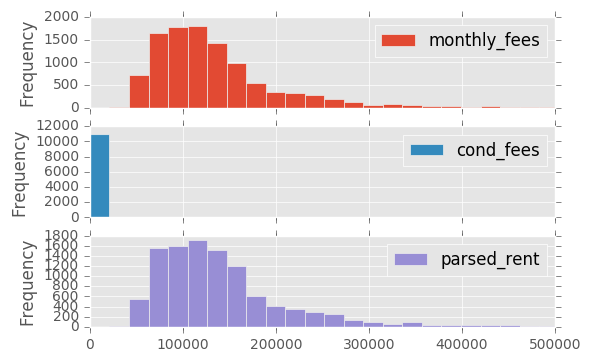

In [39]:
"""ヒストグラムでデータの分布を見てみる
bins...何個の棒に分けるか。
subplots...グラフをカラム毎に分けるか否か
xlim...X軸の表示制限
"""

df.plot(kind='hist', bins=100, subplots=True, xlim=(0, 500000))

In [58]:
"""↑２駅ルール内の家賃で一番多いのはやはり12万くらい
"""

'↑２駅ルール内の家賃で一番多いのはやはり12万くらい\n'

In [59]:
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde')

In [64]:
"""最寄り駅別に分析するためにnearest_stationsをマエショる
"""
df.nearest_stations

0        [東京メトロ銀座線 表参道駅 徒歩9分, ＪＲ山手線 渋谷駅 徒歩13分, 東京地下鉄日比谷...
1        [ＪＲ山手線 代々木駅 徒歩8分, 小田急小田原線 参宮橋駅 徒歩4分, 京王線初台駅　徒歩9分]
2                  [ＪＲ山手線 原宿駅 徒歩4分, 東京メトロ千代田線 明治神宮前駅 徒歩6分]
3        [東急東横線 代官山駅 徒歩1分, ＪＲ山手線 恵比寿駅 徒歩8分, 東京メトロ日比谷線 中...
4        [ＪＲ山手線 目黒駅 徒歩5分, 東京メトロ南北線 目黒駅 徒歩5分, 東京都三田線 目黒 ...
5               [東京メトロ日比谷線 広尾駅 徒歩11分, 東京メトロ銀座線 表参道駅 徒歩13分]
6               [東京メトロ銀座線 外苑前駅 徒歩3分, 東京メトロ千代田線 乃木坂駅 徒歩10分]
7        [東京メトロ副都心線 北参道駅 徒歩10分, 東京メトロ千代田線 明治神宮前駅 徒歩12分,...
8        [東京メトロ千代田線 代々木公園駅 徒歩8分, 小田急小田原線 代々木八幡駅 徒歩9分, 東...
9        [東京メトロ銀座線 青山一丁目駅 徒歩7分, 東京メトロ千代田線 乃木坂駅 徒歩9分, 東京...
10                                   [東京メトロ日比谷線 広尾駅 徒歩10分]
11       [ＪＲ山手線 原宿駅 徒歩7分, 東京メトロ副都心線 北参道駅 徒歩4分, 東京地下鉄千代田...
12       [東急東横線 中目黒駅 徒歩12分, 東急田園都市線 池尻大橋駅 徒歩11分, 東京メトロ日...
13       [東急田園都市線 三軒茶屋駅 徒歩8分, 東急世田谷線 西太子堂駅 徒歩12分, 東急田園都...
14       [東急田園都市線 三軒茶屋駅 徒歩8分, 東急世田谷線 西太子堂駅 徒歩12分, 東急田園都...
15       [東急田園都市線 三軒茶屋駅 徒歩8分, 東急田園都市線 駒沢大学駅 徒歩12分, 東急世田...
16       [東急東横線 中目黒駅 徒歩11分, 東急東横線 代官山駅 徒歩9分, 京王電鉄井の頭線 神.

In [76]:
len(df.nearest_stations)

10964

In [84]:
len(list(filter(None, [[s for s in stations if '徒歩' in s] for stations in df.nearest_stations])))

10964

In [220]:
"""↑nearest_stationsカラムは「徒歩」が必ず含まれていることがわかった
ので、最寄り駅名と徒歩X分に情報を分ける
"""

stations_nearby_office_h = {
    '渋谷': 'ALL',
    '代々木': '山手',
    '原宿': '山手',
    '恵比寿': '山手',
    '目黒': '山手',
    '表参道': '銀座',
    '外苑前': '銀座',
    '明治神宮前': '千代田',
    '代々木公園': '千代田',
    '乃木坂': '千代田',
    '広尾': '日比谷',
    '北参道': '副都心',
    '青山一丁目': '田園/半蔵門',
    '池尻大橋': '田園/半蔵門',
    '三軒茶屋': '田園/半蔵門',
    '代官山': '東急東横',
    '中目黒': '東急東横',
    '神泉': '井の頭',
    '駒場東大前': '井の頭'
}

stations_nearby_office = list(stations_nearby_office_h.keys())
stations_nearby_office

['神泉',
 '代々木公園',
 '恵比寿',
 '代々木',
 '駒場東大前',
 '代官山',
 '広尾',
 '表参道',
 '目黒',
 '北参道',
 '原宿',
 '乃木坂',
 '外苑前',
 '池尻大橋',
 '青山一丁目',
 '中目黒',
 '三軒茶屋',
 '渋谷',
 '明治神宮前']

In [141]:
"""「徒歩X分」を抽出するメソッドを作る
正規表現の練習もかねて
"""

minutes_on_foot = lambda station: int(re.search(r"徒歩(\d+)分", station).group(1))

print(minutes_on_foot("東京メトロ銀座線 表参道駅 徒歩9分"))
print(minutes_on_foot("ＪＲ山手線 渋谷駅 徒歩13分"))
print(minutes_on_foot("小田急小田原線 参宮橋駅 徒歩4分"))

9
13
4


In [226]:
"""色々調整したもの
"""
def is_nearby_office(station):
    return [s for s in stations_nearby_office if s in station]

def minutes_on_foot(station): 
    matched = re.search(r"駅.*[ぁ-んァ-ヶ亜-熙](\d+)分", station)
    if matched and is_nearby_office(station):
        return int(matched.group(1))
    else:
        return None
    
def extract_minutes_on_foot(stations):
    minutes = [minutes_on_foot(station) for station in stations]
    return min([m for m in minutes if m], default=None)

df['minutes_on_foot'] = df.nearest_stations.apply(extract_minutes_on_foot)
df['minutes_on_foot']

0         9.0
1         8.0
2         4.0
3         1.0
4         5.0
5        11.0
6         3.0
7         9.0
8         8.0
9         7.0
10       10.0
11        4.0
12       11.0
13        8.0
14        8.0
15        8.0
16        9.0
17        4.0
18        9.0
19        7.0
20       10.0
21        7.0
22        7.0
23        7.0
24       11.0
25       17.0
26        1.0
27        7.0
28       13.0
29       12.0
         ... 
10934     1.0
10935     1.0
10936     1.0
10937     8.0
10938    11.0
10939     7.0
10940     1.0
10941     1.0
10942     1.0
10943     1.0
10944     2.0
10945     7.0
10946     7.0
10947     7.0
10948     7.0
10949     7.0
10950     2.0
10951     3.0
10952     3.0
10953     3.0
10954     3.0
10955     3.0
10956     3.0
10957     3.0
10958    10.0
10959     3.0
10960     2.0
10961     6.0
10962     6.0
10963     6.0
Name: minutes_on_foot, dtype: float64

In [227]:
df[['nearest_stations', 'minutes_on_foot']]

,nearest_stations,minutes_on_foot
0,"[東京メトロ銀座線 表参道駅 徒歩9分, ＪＲ山手線 渋谷駅 徒歩13分, 東京地下鉄日比谷...",9.0
1,"[ＪＲ山手線 代々木駅 徒歩8分, 小田急小田原線 参宮橋駅 徒歩4分, 京王線初台駅 徒歩9分]",8.0
2,"[ＪＲ山手線 原宿駅 徒歩4分, 東京メトロ千代田線 明治神宮前駅 徒歩6分]",4.0
3,"[東急東横線 代官山駅 徒歩1分, ＪＲ山手線 恵比寿駅 徒歩8分, 東京メトロ日比谷線 中...",1.0
4,"[ＪＲ山手線 目黒駅 徒歩5分, 東京メトロ南北線 目黒駅 徒歩5分, 東京都三田線 目黒 ...",5.0
5,"[東京メトロ日比谷線 広尾駅 徒歩11分, 東京メトロ銀座線 表参道駅 徒歩13分]",11.0
6,"[東京メトロ銀座線 外苑前駅 徒歩3分, 東京メトロ千代田線 乃木坂駅 徒歩10分]",3.0
7,"[東京メトロ副都心線 北参道駅 徒歩10分, 東京メトロ千代田線 明治神宮前駅 徒歩12分,...",9.0
8,"[東京メトロ千代田線 代々木公園駅 徒歩8分, 小田急小田原線 代々木八幡駅 徒歩9分, 東...",8.0
9,"[東京メトロ銀座線 青山一丁目駅 徒歩7分, 東京メトロ千代田線 乃木坂駅 徒歩9分, 東京...",7.0


In [243]:
df[df.minutes_on_foot.isnull()][['nearest_stations', 'minutes_on_foot']]

,nearest_stations,minutes_on_foot
251,"[小田急小田原線 参宮橋駅 徒歩5分, 京王線 初台駅 徒歩8分]",NaN
295,"[東急東横線 祐天寺駅 徒歩5分, 東急東横線 学芸大学駅 徒歩13分, 東急東横線 中目黒...",NaN
582,"[東急東横線 祐天寺駅 徒歩5分, 東急東横線 学芸大学駅 徒歩13分, 東急東横線 中目黒...",NaN
928,"[東急東横線 祐天寺駅 徒歩8分, 東急東横線 学芸大学駅 徒歩11分]",NaN
1399,[東急東横線 祐天寺駅 徒歩14分],NaN
1463,"[東急東横線 学芸大学駅 徒歩14分, 東急東横線 祐天寺駅 徒歩14分, 東急目黒線 武蔵...",NaN
1543,"[東急東横線 祐天寺駅 徒歩4分, 東急東横線 学芸大学駅 徒歩15分]",NaN
1616,"[東急東横線 学芸大学駅 徒歩6分, 東急東横線 祐天寺駅 徒歩9分, 東急田園都市線 三軒...",NaN
1718,[東急東横線 祐天寺駅 徒歩5分],NaN
1869,"[東急世田谷線 若林駅 徒歩9分, 東急田園都市線 駒沢大学駅 徒歩11分, 東急世田谷線 ...",NaN


In [244]:
"""↑はゴミデータなのでお掃除
"""
df = df.dropna(subset=['minutes_on_foot'])
df

,address,birthday,deposit,dimension,layout,nearest_stations,rent,tip,title,url,window_angle,monthly_fees,cond_fees,parsed_rent,minutes_on_foot
0,東京都港区南青山6丁目15-6,1986年7月 ( 築31年 ),4ヶ月,213m²,4LDK\n ( リビング 32帖\nダイニングキッチン 12帖\n洋室 17.5帖...,"[東京メトロ銀座線 表参道駅 徒歩9分, ＪＲ山手線 渋谷駅 徒歩13分, 東京地下鉄日比谷...",80万円 ( - ),無,ケミーコート,https://www.homes.co.jp/chintai/ky-12341256819...,南,80.00,0.000,80.000,9.0
1,東京都渋谷区代々木3丁目,1990年1月 ( 築28年 ),2ヶ月,99.61m²,3LDK\n ( リビングダイニング 16.5帖\n洋室 8.2帖\n洋室 6.6帖...,"[ＪＲ山手線 代々木駅 徒歩8分, 小田急小田原線 参宮橋駅 徒歩4分, 京王線初台駅 徒歩9分]",36万円 ( - ),1ヶ月,グランドメゾン参宮橋,https://www.homes.co.jp/chintai/ky-4dd1b948087...,南東,36.00,0.000,36.000,8.0
2,東京都渋谷区千駄ヶ谷3丁目,2004年1月 ( 築14年 ),2ヶ月,143.61m²,2LDK\n ( キッチン 4帖\nリビングダイニング 40帖\n洋室 9帖\n洋室...,"[ＪＲ山手線 原宿駅 徒歩4分, 東京メトロ千代田線 明治神宮前駅 徒歩6分]",62万円 ( - ),1ヶ月,クエストコート原宿,https://www.homes.co.jp/chintai/ky-8fd73559389...,南,62.00,0.000,62.000,4.0
3,東京都渋谷区恵比寿西1丁目35-11,1971年6月 ( 築46年 ),1ヶ月,134m²,3LDK\n ( リビングダイニング 27.6帖(2階)\nキッチン 7.5帖(2階...,"[東急東横線 代官山駅 徒歩1分, ＪＲ山手線 恵比寿駅 徒歩8分, 東京メトロ日比谷線 中...",68万円 ( - ),1ヶ月,代官山タワー,https://www.homes.co.jp/chintai/ky-b36f1728bd3...,南,68.00,0.000,68.000,1.0
4,東京都品川区上大崎2丁目,1983年8月 ( 築34年 ),2ヶ月,191.44m²,4LDK\n ( キッチン\nリビングダイニング 34.2帖\n洋室 12帖\n洋室...,"[ＪＲ山手線 目黒駅 徒歩5分, 東京メトロ南北線 目黒駅 徒歩5分, 東京都三田線 目黒 ...",80万円 ( - ),無,パークサイド目黒,https://www.homes.co.jp/chintai/ky-c15a39bf240...,北西,80.00,0.000,80.000,5.0
5,東京都港区南青山7丁目13-3,1968年12月 ( 築49年 ),3ヶ月,162.4m²,2SLDK\n ( リビングダイニングキッチン 30帖(3階)\n洋室 8帖(3階)...,"[東京メトロ日比谷線 広尾駅 徒歩11分, 東京メトロ銀座線 表参道駅 徒歩13分]",58万円 ( - ),1ヶ月,高樹町スカイマンション,https://www.homes.co.jp/chintai/ky-435e42f84f7...,北東,58.00,0.000,58.000,11.0
6,東京都港区南青山2丁目29,2004年6月 ( 築13年 ),2ヶ月,110.25m²,2LDK\n ( リビングダイニング 20.8帖\n洋室 6帖\n洋室 6帖\n洋室...,"[東京メトロ銀座線 外苑前駅 徒歩3分, 東京メトロ千代田線 乃木坂駅 徒歩10分]",58万円 ( - ),2ヶ月,青山ザ・タワー,https://www.homes.co.jp/chintai/ky-43c2a93d634...,南,58.00,0.000,58.000,3.0
7,東京都渋谷区神宮前2丁目29-1,2007年2月 ( 築11年 ),2ヶ月,104.78m²,2LDK\n ( 洋室 10帖(5階)\n洋室 8.6帖(5階)\nリビングダイニン...,"[東京メトロ副都心線 北参道駅 徒歩10分, 東京メトロ千代田線 明治神宮前駅 徒歩12分,...","60万円 ( 37,550円 )",1ヶ月,ジェントルエア神宮前,https://www.homes.co.jp/chintai/ky-7c48676ddf7...,南,60.00,3.755,63.755,9.0
8,東京都渋谷区富ヶ谷2丁目,1984年8月 ( 築33年 ),4ヶ月,198m²,4LDK\n ( リビング 21.2帖(1階)\nダイニングキッチン 7帖(1階)\...,"[東京メトロ千代田線 代々木公園駅 徒歩8分, 小田急小田原線 代々木八幡駅 徒歩9分, 東...",70万円 ( - ),無,富ヶ谷Hハウス A,https://www.homes.co.jp/chintai/ky-b98a2917546...,南西,70.00,0.000,70.000,8.0
9,東京都港区赤坂7丁目,1969年9月 ( 築48年 ),3ヶ月,142.33m²,2LDK,"[東京メトロ銀座線 青山一丁目駅 徒歩7分, 東京メトロ千代田線 乃木坂駅 徒歩9分, 東京...",50万円 ( - ),無,赤坂プラザ,https://www.homes.co.jp/chintai/ky-d4a6dd936a8...,南東,50.00,0.000,50.000,7.0


In [256]:
"""最寄り駅を抽出するメソッドを作る
"""
from itertools import chain
flatten = lambda l: list(chain.from_iterable(l))
uniq = lambda l: list(set(l))

def extract_nearest_station(df):
    if df['minutes_on_foot']:
        candidates =  [s for s in df['nearest_stations'] if str(int(df['minutes_on_foot'])) in s]
        return uniq(flatten([is_nearby_office(station) for station in candidates]))
    else:
        return None

df['nearest_station'] = df.apply(extract_nearest_station, axis='columns')
df['nearest_station']

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0                [表参道]
1                [代々木]
2                 [原宿]
3                [代官山]
4                 [目黒]
5                 [広尾]
6                [外苑前]
7                 [原宿]
8         [代々木, 代々木公園]
9              [青山一丁目]
10                [広尾]
11               [北参道]
12              [池尻大橋]
13              [三軒茶屋]
14              [三軒茶屋]
15              [三軒茶屋]
16               [代官山]
17               [代官山]
18           [中目黒, 目黒]
19                [目黒]
20           [中目黒, 目黒]
21           [中目黒, 目黒]
22           [中目黒, 目黒]
23           [中目黒, 目黒]
24           [中目黒, 目黒]
25           [中目黒, 目黒]
26               [代官山]
27               [恵比寿]
28           [中目黒, 目黒]
29           [中目黒, 目黒]
             ...      
10934    [駒場東大前, 池尻大橋]
10935    [駒場東大前, 池尻大橋]
10936    [駒場東大前, 池尻大橋]
10937             [渋谷]
10938         [神泉, 渋谷]
10939             [渋谷]
10940    [駒場東大前, 池尻大橋]
10941    [駒場東大前, 池尻大橋]
10942    [駒場東大前, 池尻大橋]
10943             [神泉]
10944             [神泉]
10945             [渋谷]
10946      

In [263]:
df['nearest_station'].sort_values()

10172               []
4037            [三軒茶屋]
2868            [三軒茶屋]
2869            [三軒茶屋]
2870            [三軒茶屋]
2871            [三軒茶屋]
2872            [三軒茶屋]
2873            [三軒茶屋]
2874            [三軒茶屋]
2875            [三軒茶屋]
2876            [三軒茶屋]
2877            [三軒茶屋]
2878            [三軒茶屋]
4532            [三軒茶屋]
2880            [三軒茶屋]
2881            [三軒茶屋]
2882            [三軒茶屋]
2883            [三軒茶屋]
2884            [三軒茶屋]
2885            [三軒茶屋]
2886            [三軒茶屋]
2887            [三軒茶屋]
2888            [三軒茶屋]
2889            [三軒茶屋]
2890            [三軒茶屋]
2891            [三軒茶屋]
4531            [三軒茶屋]
2893            [三軒茶屋]
2894            [三軒茶屋]
2867            [三軒茶屋]
             ...      
5115     [駒場東大前, 池尻大橋]
5040     [駒場東大前, 池尻大橋]
5044     [駒場東大前, 池尻大橋]
5046     [駒場東大前, 池尻大橋]
5072     [駒場東大前, 池尻大橋]
5064     [駒場東大前, 池尻大橋]
5142     [駒場東大前, 池尻大橋]
1802     [駒場東大前, 池尻大橋]
4936     [駒場東大前, 池尻大橋]
4916     [駒場東大前, 池尻大橋]
10630    [駒場東大前, 池尻大橋]
10633    [駒場東大前, 池尻大橋]
5055     [駒

In [273]:
"""最寄り駅の取れなかったデータはゴミデータなのでお掃除
"""
df = df[df['nearest_station'].astype(str) != '[]']
df['nearest_station'].sort_values()

3585            [三軒茶屋]
2714            [三軒茶屋]
2715            [三軒茶屋]
2716            [三軒茶屋]
2717            [三軒茶屋]
2718            [三軒茶屋]
4296            [三軒茶屋]
2720            [三軒茶屋]
2721            [三軒茶屋]
2722            [三軒茶屋]
4295            [三軒茶屋]
2724            [三軒茶屋]
2725            [三軒茶屋]
2713            [三軒茶屋]
2726            [三軒茶屋]
2728            [三軒茶屋]
2729            [三軒茶屋]
2730            [三軒茶屋]
2731            [三軒茶屋]
2732            [三軒茶屋]
2734            [三軒茶屋]
2735            [三軒茶屋]
2736            [三軒茶屋]
2737            [三軒茶屋]
2738            [三軒茶屋]
2739            [三軒茶屋]
2740            [三軒茶屋]
4294            [三軒茶屋]
2712            [三軒茶屋]
2711            [三軒茶屋]
             ...      
5115     [駒場東大前, 池尻大橋]
5040     [駒場東大前, 池尻大橋]
5044     [駒場東大前, 池尻大橋]
5046     [駒場東大前, 池尻大橋]
5072     [駒場東大前, 池尻大橋]
5064     [駒場東大前, 池尻大橋]
5142     [駒場東大前, 池尻大橋]
1802     [駒場東大前, 池尻大橋]
4936     [駒場東大前, 池尻大橋]
4916     [駒場東大前, 池尻大橋]
10630    [駒場東大前, 池尻大橋]
10633    [駒場東大前, 池尻大橋]
5055     [駒

In [275]:
df['nearest_station'] = df['nearest_station'].apply(lambda candidates: candidates[0])
df['nearest_station'].sort_values()

3585      三軒茶屋
2980      三軒茶屋
4625      三軒茶屋
2982      三軒茶屋
4624      三軒茶屋
2984      三軒茶屋
2985      三軒茶屋
4623      三軒茶屋
2988      三軒茶屋
2989      三軒茶屋
4622      三軒茶屋
2991      三軒茶屋
2992      三軒茶屋
4621      三軒茶屋
2994      三軒茶屋
2995      三軒茶屋
2996      三軒茶屋
2997      三軒茶屋
2998      三軒茶屋
4620      三軒茶屋
3000      三軒茶屋
3001      三軒茶屋
3002      三軒茶屋
3003      三軒茶屋
3004      三軒茶屋
3005      三軒茶屋
3006      三軒茶屋
3007      三軒茶屋
3008      三軒茶屋
3009      三軒茶屋
         ...  
10669    駒場東大前
10667    駒場東大前
10666    駒場東大前
10665    駒場東大前
10664    駒場東大前
10673    駒場東大前
10703    駒場東大前
10704    駒場東大前
10705    駒場東大前
5843     駒場東大前
5844     駒場東大前
5845     駒場東大前
5846     駒場東大前
5847     駒場東大前
5848     駒場東大前
5849     駒場東大前
5850     駒場東大前
5851     駒場東大前
5852     駒場東大前
5857     駒場東大前
5873     駒場東大前
5876     駒場東大前
5884     駒場東大前
5888     駒場東大前
5900     駒場東大前
5901     駒場東大前
5902     駒場東大前
5924     駒場東大前
5017     駒場東大前
10655    駒場東大前
Name: nearest_station, dtype: object

In [276]:
"""nearest_stationが追加できた
"""
df

,address,birthday,deposit,dimension,layout,nearest_stations,rent,tip,title,url,window_angle,monthly_fees,cond_fees,parsed_rent,minutes_on_foot,nearest_station
0,東京都港区南青山6丁目15-6,1986年7月 ( 築31年 ),4ヶ月,213m²,4LDK\n ( リビング 32帖\nダイニングキッチン 12帖\n洋室 17.5帖...,"[東京メトロ銀座線 表参道駅 徒歩9分, ＪＲ山手線 渋谷駅 徒歩13分, 東京地下鉄日比谷...",80万円 ( - ),無,ケミーコート,https://www.homes.co.jp/chintai/ky-12341256819...,南,80.00,0.000,80.000,9.0,表参道
1,東京都渋谷区代々木3丁目,1990年1月 ( 築28年 ),2ヶ月,99.61m²,3LDK\n ( リビングダイニング 16.5帖\n洋室 8.2帖\n洋室 6.6帖...,"[ＪＲ山手線 代々木駅 徒歩8分, 小田急小田原線 参宮橋駅 徒歩4分, 京王線初台駅 徒歩9分]",36万円 ( - ),1ヶ月,グランドメゾン参宮橋,https://www.homes.co.jp/chintai/ky-4dd1b948087...,南東,36.00,0.000,36.000,8.0,代々木
2,東京都渋谷区千駄ヶ谷3丁目,2004年1月 ( 築14年 ),2ヶ月,143.61m²,2LDK\n ( キッチン 4帖\nリビングダイニング 40帖\n洋室 9帖\n洋室...,"[ＪＲ山手線 原宿駅 徒歩4分, 東京メトロ千代田線 明治神宮前駅 徒歩6分]",62万円 ( - ),1ヶ月,クエストコート原宿,https://www.homes.co.jp/chintai/ky-8fd73559389...,南,62.00,0.000,62.000,4.0,原宿
3,東京都渋谷区恵比寿西1丁目35-11,1971年6月 ( 築46年 ),1ヶ月,134m²,3LDK\n ( リビングダイニング 27.6帖(2階)\nキッチン 7.5帖(2階...,"[東急東横線 代官山駅 徒歩1分, ＪＲ山手線 恵比寿駅 徒歩8分, 東京メトロ日比谷線 中...",68万円 ( - ),1ヶ月,代官山タワー,https://www.homes.co.jp/chintai/ky-b36f1728bd3...,南,68.00,0.000,68.000,1.0,代官山
4,東京都品川区上大崎2丁目,1983年8月 ( 築34年 ),2ヶ月,191.44m²,4LDK\n ( キッチン\nリビングダイニング 34.2帖\n洋室 12帖\n洋室...,"[ＪＲ山手線 目黒駅 徒歩5分, 東京メトロ南北線 目黒駅 徒歩5分, 東京都三田線 目黒 ...",80万円 ( - ),無,パークサイド目黒,https://www.homes.co.jp/chintai/ky-c15a39bf240...,北西,80.00,0.000,80.000,5.0,目黒
5,東京都港区南青山7丁目13-3,1968年12月 ( 築49年 ),3ヶ月,162.4m²,2SLDK\n ( リビングダイニングキッチン 30帖(3階)\n洋室 8帖(3階)...,"[東京メトロ日比谷線 広尾駅 徒歩11分, 東京メトロ銀座線 表参道駅 徒歩13分]",58万円 ( - ),1ヶ月,高樹町スカイマンション,https://www.homes.co.jp/chintai/ky-435e42f84f7...,北東,58.00,0.000,58.000,11.0,広尾
6,東京都港区南青山2丁目29,2004年6月 ( 築13年 ),2ヶ月,110.25m²,2LDK\n ( リビングダイニング 20.8帖\n洋室 6帖\n洋室 6帖\n洋室...,"[東京メトロ銀座線 外苑前駅 徒歩3分, 東京メトロ千代田線 乃木坂駅 徒歩10分]",58万円 ( - ),2ヶ月,青山ザ・タワー,https://www.homes.co.jp/chintai/ky-43c2a93d634...,南,58.00,0.000,58.000,3.0,外苑前
7,東京都渋谷区神宮前2丁目29-1,2007年2月 ( 築11年 ),2ヶ月,104.78m²,2LDK\n ( 洋室 10帖(5階)\n洋室 8.6帖(5階)\nリビングダイニン...,"[東京メトロ副都心線 北参道駅 徒歩10分, 東京メトロ千代田線 明治神宮前駅 徒歩12分,...","60万円 ( 37,550円 )",1ヶ月,ジェントルエア神宮前,https://www.homes.co.jp/chintai/ky-7c48676ddf7...,南,60.00,3.755,63.755,9.0,原宿
8,東京都渋谷区富ヶ谷2丁目,1984年8月 ( 築33年 ),4ヶ月,198m²,4LDK\n ( リビング 21.2帖(1階)\nダイニングキッチン 7帖(1階)\...,"[東京メトロ千代田線 代々木公園駅 徒歩8分, 小田急小田原線 代々木八幡駅 徒歩9分, 東...",70万円 ( - ),無,富ヶ谷Hハウス A,https://www.homes.co.jp/chintai/ky-b98a2917546...,南西,70.00,0.000,70.000,8.0,代々木
9,東京都港区赤坂7丁目,1969年9月 ( 築48年 ),3ヶ月,142.33m²,2LDK,"[東京メトロ銀座線 青山一丁目駅 徒歩7分, 東京メトロ千代田線 乃木坂駅 徒歩9分, 東京...",50万円 ( - ),無,赤坂プラザ,https://www.homes.co.jp/chintai/ky-d4a6dd936a8...,南東,50.00,0.000,50.000,7.0,青山一丁目


In [296]:
"""更に路線を追加
"""

df['nearest_track'] = df['nearest_station'].apply(lambda station: stations_nearby_office_h[station])
df['nearest_track']

0            銀座
1            山手
2            山手
3          東急東横
4            山手
5           日比谷
6            銀座
7            山手
8            山手
9        田園/半蔵門
10          日比谷
11          副都心
12       田園/半蔵門
13       田園/半蔵門
14       田園/半蔵門
15       田園/半蔵門
16         東急東横
17         東急東横
18         東急東横
19           山手
20         東急東横
21         東急東横
22         東急東横
23         東急東横
24         東急東横
25         東急東横
26         東急東横
27           山手
28         東急東横
29         東急東横
          ...  
10934       井の頭
10935       井の頭
10936       井の頭
10937       ALL
10938       井の頭
10939       ALL
10940       井の頭
10941       井の頭
10942       井の頭
10943       井の頭
10944       井の頭
10945       ALL
10946       ALL
10947       ALL
10948       ALL
10949       ALL
10950       ALL
10951        山手
10952       ALL
10953       ALL
10954       ALL
10955        山手
10956        山手
10957       ALL
10958       井の頭
10959       井の頭
10960       井の頭
10961       ALL
10962       ALL
10963       ALL
Name: nearest_track, dty

## 2.ここから分析

In [306]:
pivoted_df = pd.pivot_table(
    df, 
    columns=['nearest_station_h'], 
    values=['minutes_on_foot', 'parsed_rent'], 
    aggfunc='median'
).sort_values('parsed_rent', axis='columns')
pivoted_df

nearest_station,三軒茶屋,中目黒,駒場東大前,池尻大橋,神泉,代々木,恵比寿,北参道,目黒,広尾,原宿,明治神宮前,表参道,乃木坂,外苑前,渋谷,青山一丁目,代官山
minutes_on_foot,10.0,10.0,6.0,8.0,4.0,6.00,6.0,3.0,7.0,10.0,6.00,6.0,8.0,7.0,4.0,6.0,5.0,5.0
parsed_rent,9.5,10.3,11.2,11.5,12.5,13.05,13.5,13.9,14.2,14.3,14.65,15.2,15.4,15.4,16.0,16.0,20.4,21.9


In [433]:
"""家賃の中央値が一番安いのは三茶、一番高いのは代官山ということがわかった
"""

pivoted_df.sort_values(['minutes_on_foot', 'parsed_rent'], axis='columns')

nearest_station,北参道,神泉,外苑前,青山一丁目,代官山,駒場東大前,代々木,恵比寿,原宿,明治神宮前,渋谷,目黒,乃木坂,池尻大橋,表参道,三軒茶屋,中目黒,広尾
minutes_on_foot,3.0,4.0,4.0,5.0,5.0,6.0,6.00,6.0,6.00,6.0,6.0,7.0,7.0,8.0,8.0,10.0,10.0,10.0
parsed_rent,13.9,12.5,16.0,20.4,21.9,11.2,13.05,13.5,14.65,15.2,16.0,14.2,15.4,11.5,15.4,9.5,10.3,14.3


In [449]:
"""徒歩X分の中央値が一番小さい（≒駅チカ物件）のは北参道、一番大きいのは三軒茶屋
"""

point = pivoted_df.T.minutes_on_foot + pivoted_df.T.parsed_rent
point.sort_values()

nearest_station
point     2.00
神泉       16.50
北参道      16.90
駒場東大前    17.20
代々木      19.05
恵比寿      19.50
三軒茶屋     19.50
池尻大橋     19.50
外苑前      20.00
中目黒      20.30
原宿       20.65
目黒       21.20
明治神宮前    21.20
渋谷       22.00
乃木坂      22.40
表参道      23.40
広尾       24.30
青山一丁目    25.40
代官山      26.90
dtype: float64

In [ ]:
"""↑2駅ルール内で、駅近で家賃が安い物件が比較的多そうな駅は、「神泉」、「北参道」、「駒場東大前」あたり。
"""

In [346]:
"""デフォルトでは日本語フォント入れないとグラフ化した時に文字化けするのでカラムを英字に変換する...
"""
nearest_station_h = {
    '渋谷': 'shibuya',
    '代々木': 'yoyogi',
    '原宿': 'harajuku',
    '恵比寿': 'ebisu',
    '目黒': 'meguro',
    '表参道': 'omotesando',
    '外苑前': 'gaienmae',
    '明治神宮前': 'meijijingumae',
    '代々木公園': 'yoyogikoen',
    '乃木坂': 'nogizaka',
    '広尾': 'hiro',
    '北参道': 'kitasando',
    '青山一丁目': 'aoyamaicchome',
    '池尻大橋': 'ikejiriohashi',
    '三軒茶屋': 'sangenjaya',
    '代官山': 'daikanyama',
    '中目黒': 'nakameguro',
    '神泉': 'shinsen',
    '駒場東大前': 'komabatodaimae'
}

nearest_track_h = {
    'ALL': 'Shibuya',
    '山手': 'yamanote',
    '銀座': 'ginza',
    '千代田': 'chiyoda',
    '日比谷': 'hibiya',
    '副都心': 'hukutoshin',
    '田園/半蔵門': 'dt/hz',
    '東急東横': 'tokyutoyoko',
    '井の頭': 'inokashira'
}

df['nearest_station_h'] = df['nearest_station'].apply(lambda s: nearest_station_h[s])
df['nearest_track_h'] = df['nearest_track'].apply(lambda t: nearest_track_h[t])
df[['nearest_station_h', 'nearest_track_h']]

,nearest_station_h,nearest_track_h
0,omotesando,ginza
1,yoyogi,yamanote
2,harajuku,yamanote
3,daikanyama,tokyutoyoko
4,meguro,yamanote
5,hiro,hibiya
6,gaienmae,ginza
7,harajuku,yamanote
8,yoyogi,yamanote
9,aoyamaicchome,dt/hz


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2918cebac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f29185e6940>]], dtype=object)

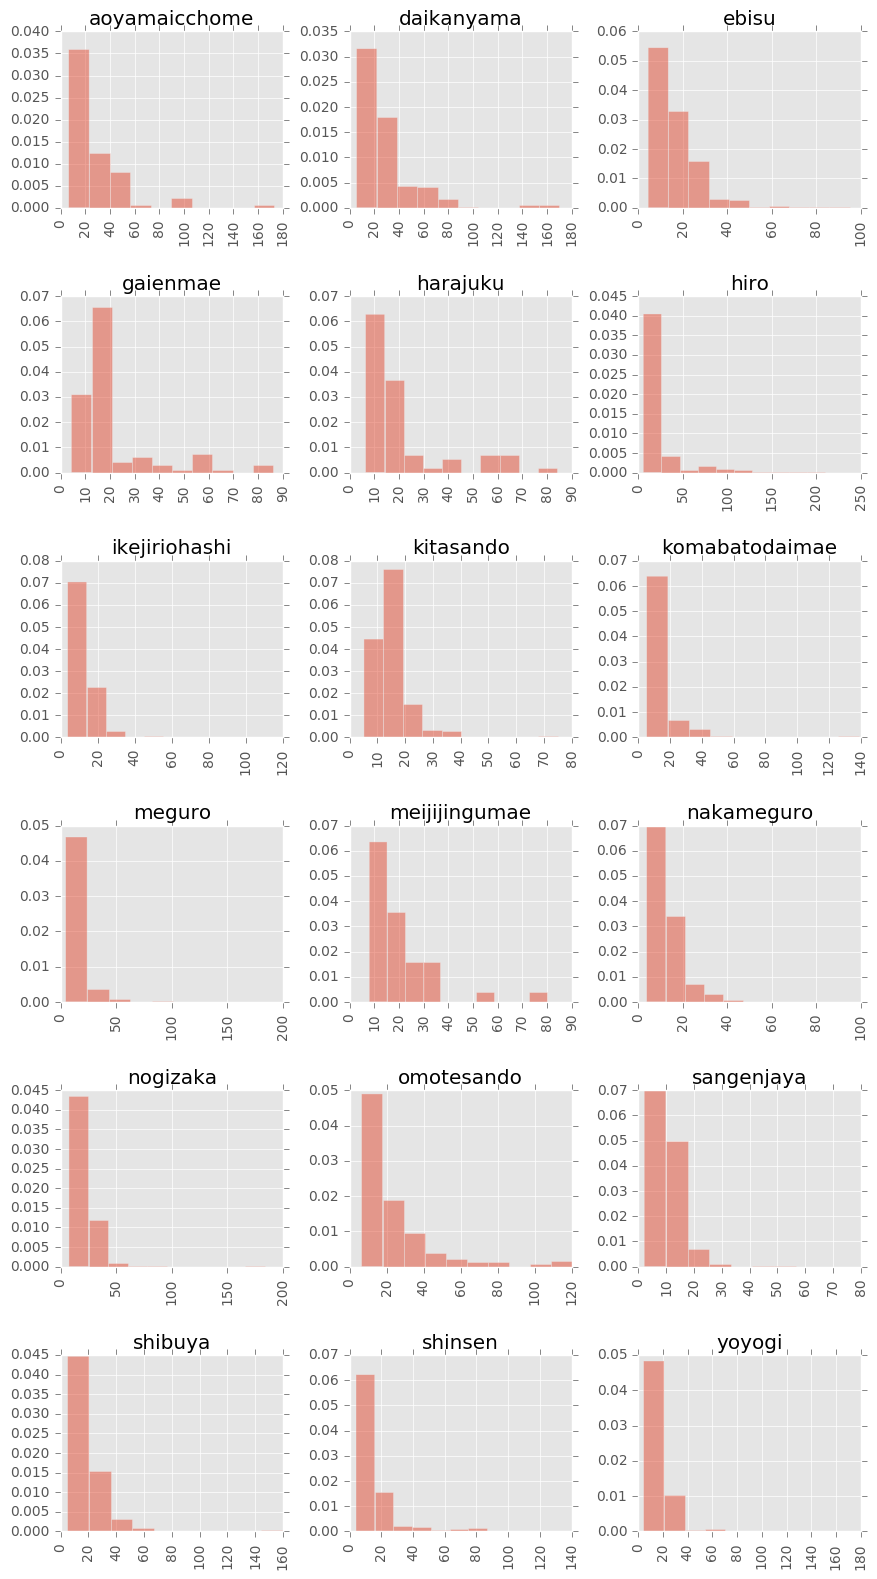

In [369]:
df[['parsed_rent', 'nearest_station_h']].hist(by='nearest_station_h', layout=(6,3), figsize=(10,20), alpha=0.5, normed=True)

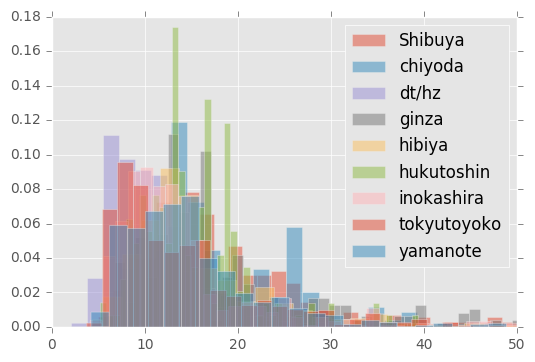

In [404]:
fig, ax = plt.subplots()
ax.set_xlim(0, 50)

for k, v in df.groupby("nearest_track_h")['parsed_rent']:
    v.hist(label=k, alpha=.50, ax=ax, bins=100, normed=True)
ax.legend()

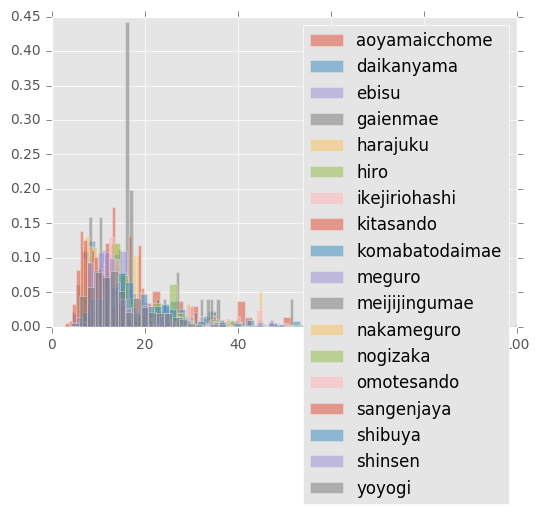

In [411]:
fig, ax = plt.subplots()
ax.set_xlim(0, 100)

for k, v in df.groupby("nearest_station_h")['parsed_rent']:
    v.hist(label=k, alpha=.50, ax=ax, bins=100, normed=True)
ax.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2923522e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f292308b198>]], dtype=object)

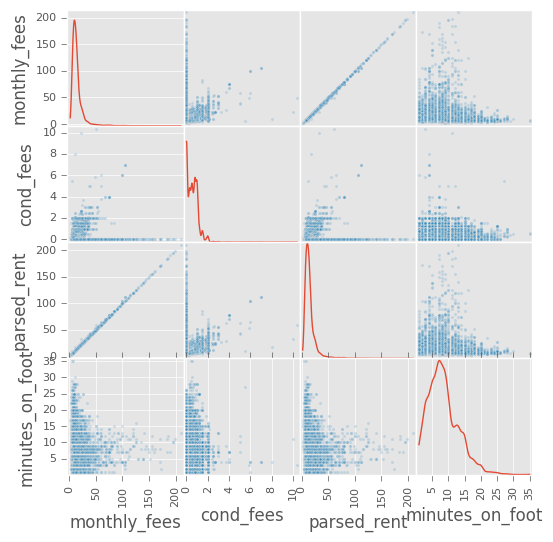

In [352]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde')

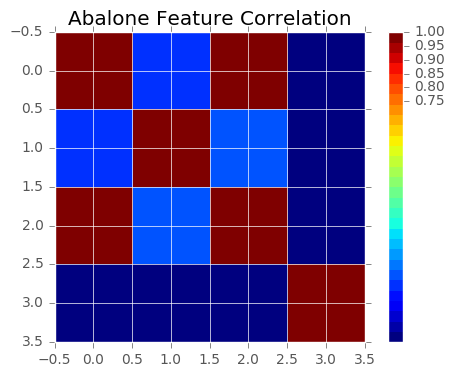

In [428]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.title('Abalone Feature Correlation')
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)